In [1]:
%pylab notebook

import master
import healpy as h

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


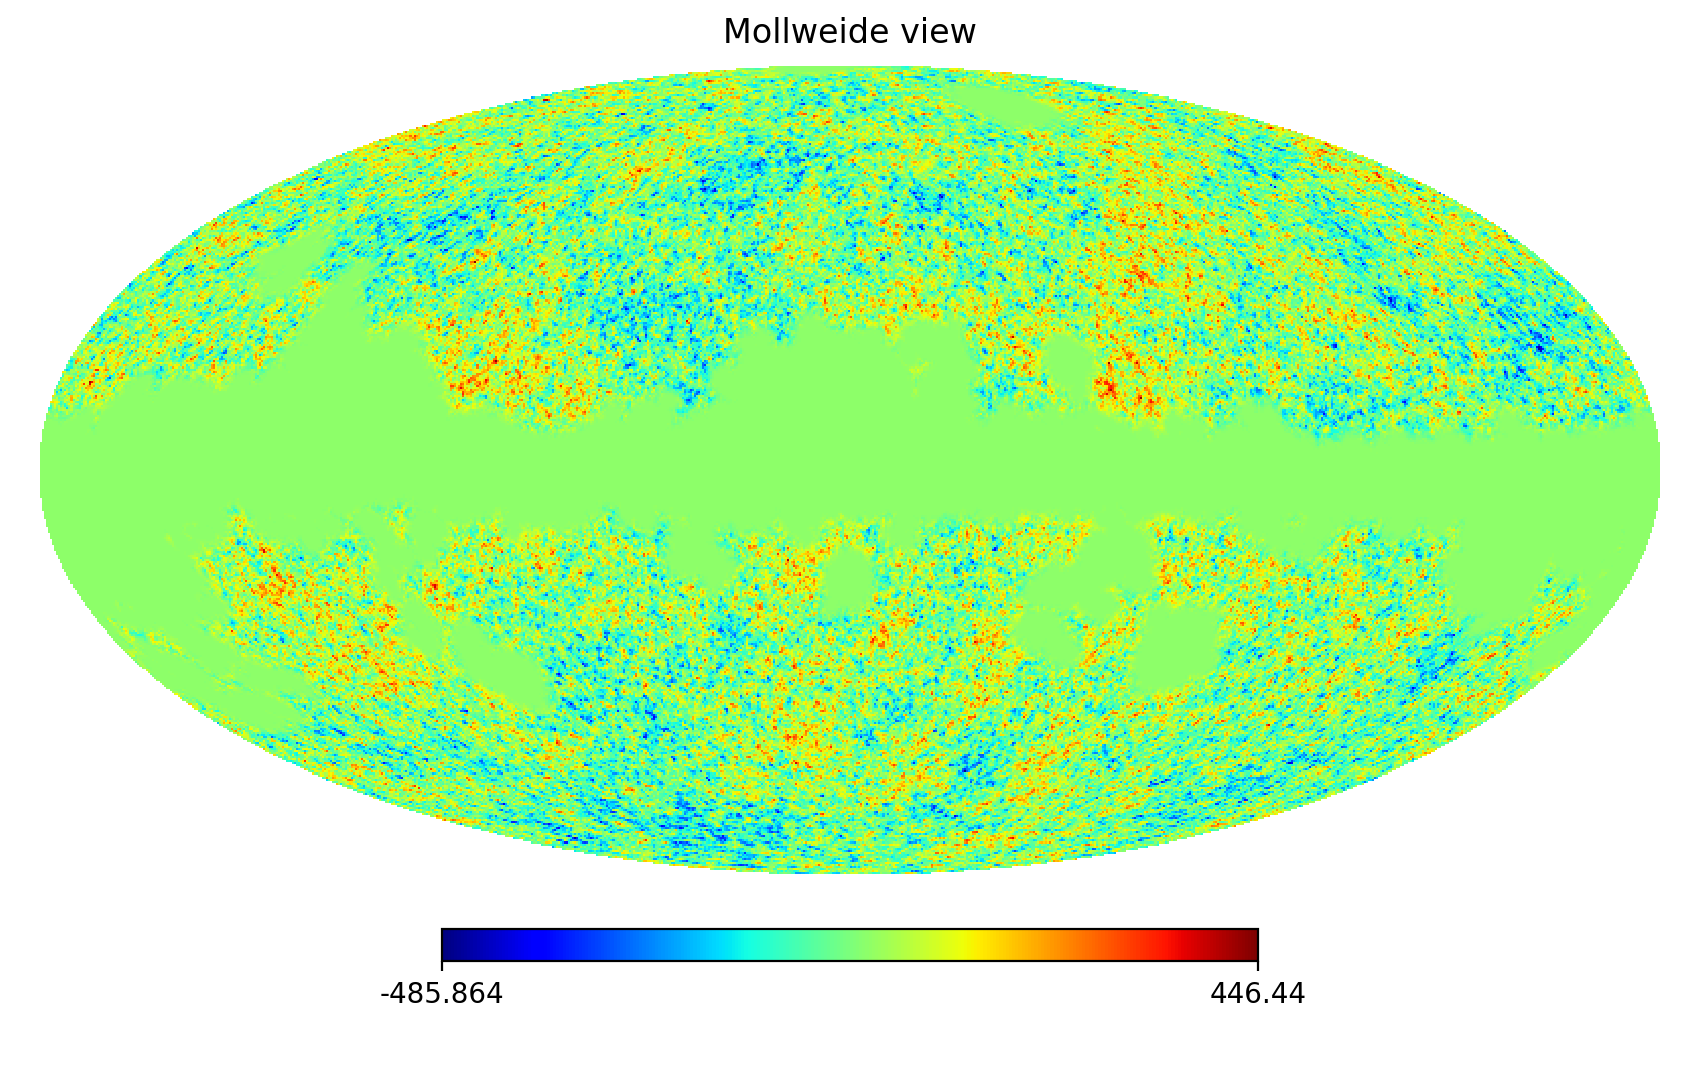

In [2]:
cl=h.read_cl("planck_wp_highL_lensing_param.fits")[0]
mask=h.read_map("../master-power-spectrum-estimation_v0/data/in/mask1.fits",verbose=False)
cmb=h.synfast(cl,256,verbose=False)
h.mollview(cmb*mask)

<IPython.core.display.Javascript object>


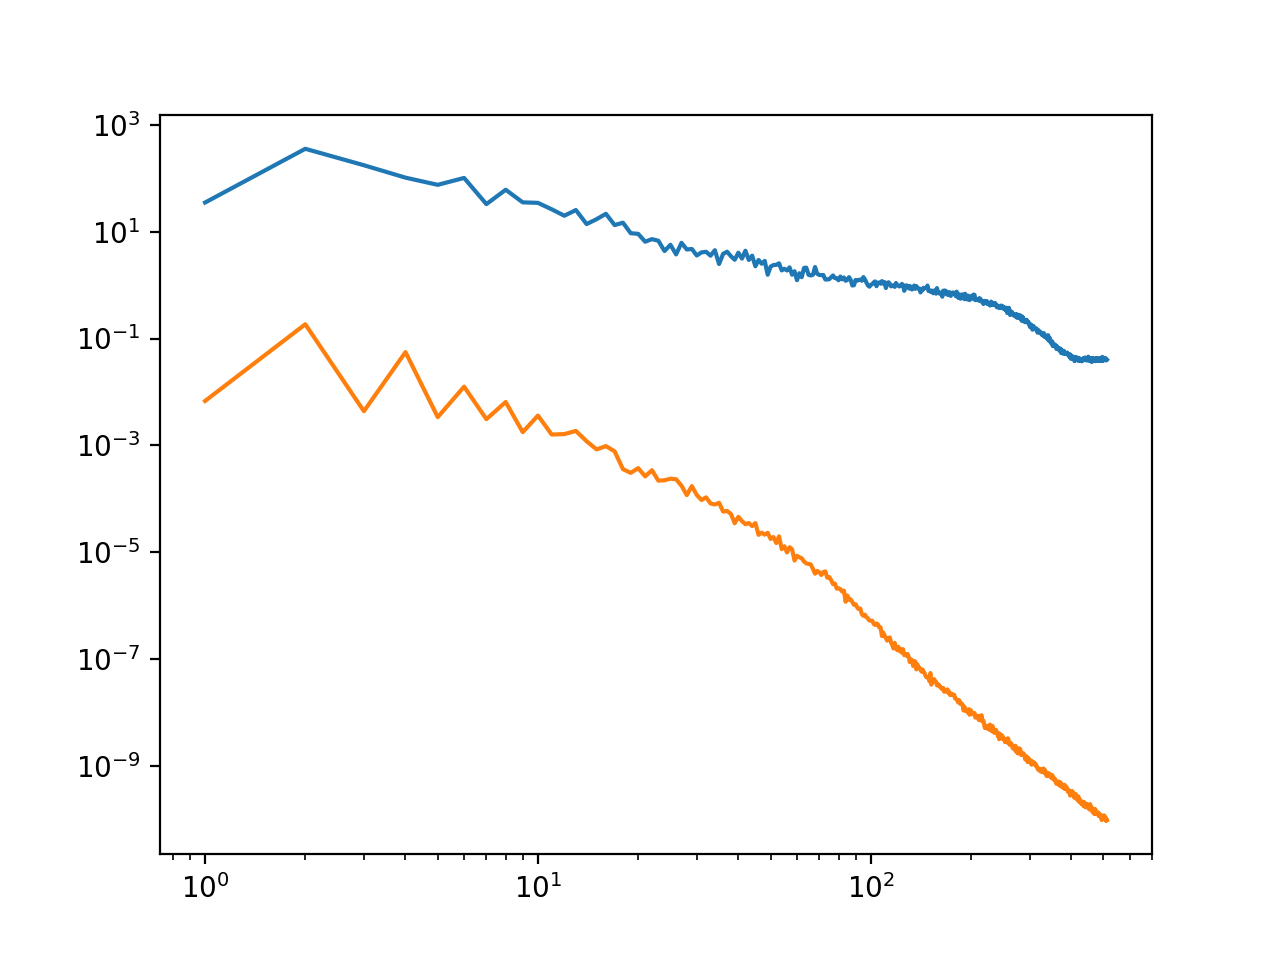

[]

In [3]:
lmax=512 ; masklmax=512
wl=h.alm2cl(h.map2alm(mask,lmax=masklmax))
clm=h.alm2cl(h.map2alm(cmb*mask,lmax=lmax))
figure()
plot(clm)
plot(wl)
loglog()

In [4]:
mllp,ipiv,info=master.master.calc_kernel(wl,lmax,masklmax)

In [5]:
info=master.master.est_true_cl(clm,mllp,ipiv,lmax)

In [7]:
ell=arange(clm.size)
f=ell*(ell+1)/(2.*pi)
clmd=h.alm2cl(h.map2alm(cmb*mask,lmax=lmax))
cld=h.alm2cl(h.map2alm(cmb,lmax=lmax))

<IPython.core.display.Javascript object>


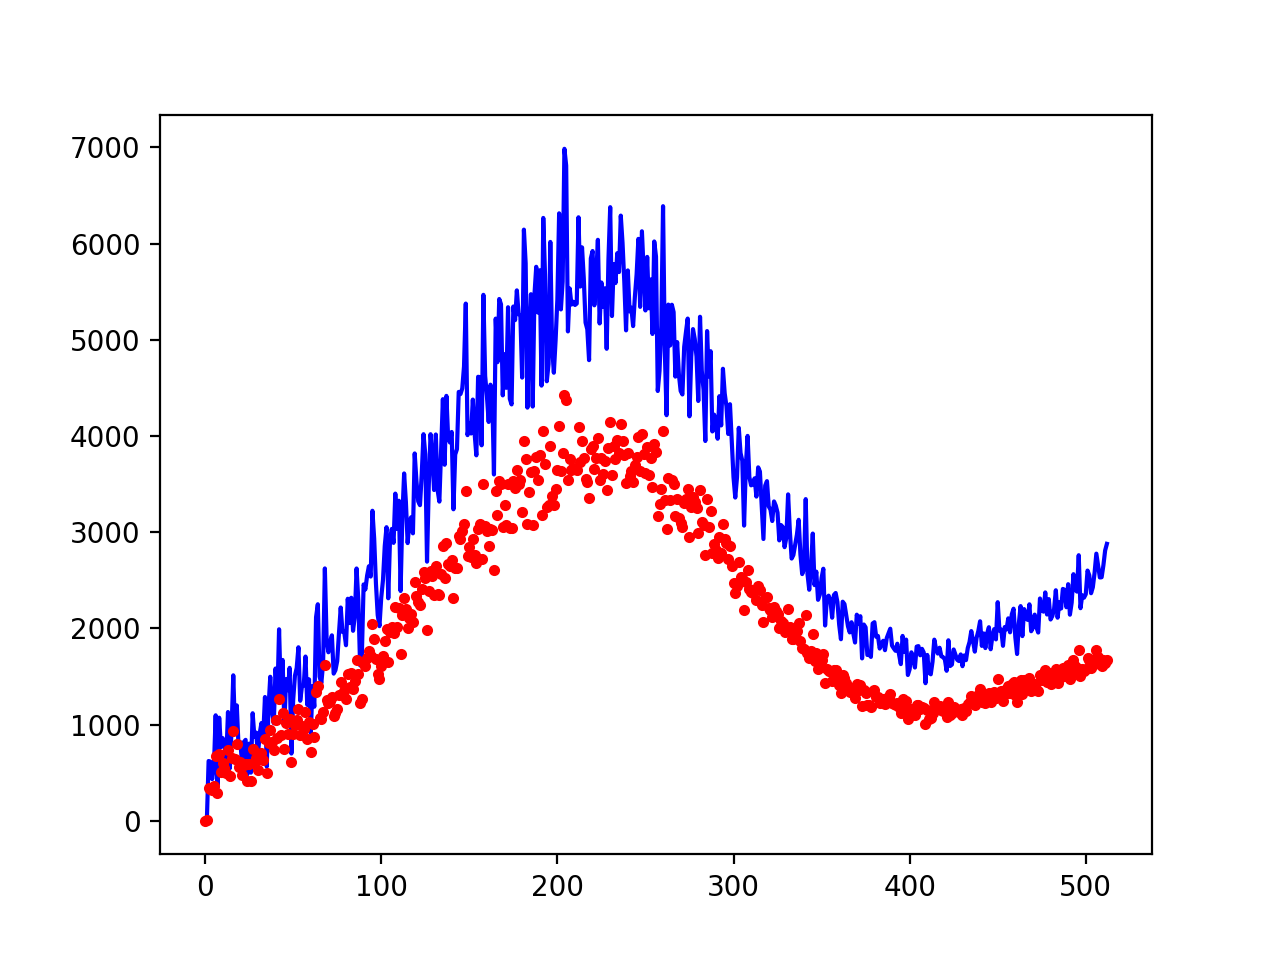

In [10]:
fsky=sum(mask)/size(mask)
#plot(f*cld,"r-")

figure()
plot(f*clm,"b-")
plot(f*clmd,"r.")
#loglog()

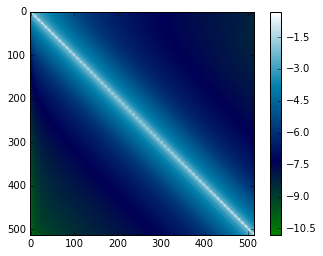

In [54]:
imshow(log10(mllp), cmap=plt.cm.ocean)
colorbar()

In [55]:
cld=h.alm2cl(h.map2alm(cmb*mask,lmax=lmax))



[]

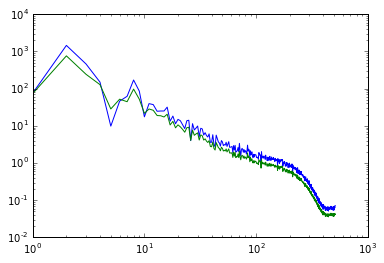

In [56]:
plot(clm)
plot(cld)
loglog()